# Prediction on test images

Import necessary libraries

In [1]:
import numpy as np
from keras.preprocessing import image

2023-02-11 17:30:37.370703: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-11 17:30:38.050353: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/khiem/anaconda3/lib/:/home/khiem/anaconda3/lib/
2023-02-11 17:30:38.050408: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/khiem/anaconda3/lib/:/home/khiem/anaconda3/lib/
2023-02-11 17:30:38.

Define test images

cat.shape: (1, 150, 150, 3)
dog.shape: (1, 150, 150, 3)


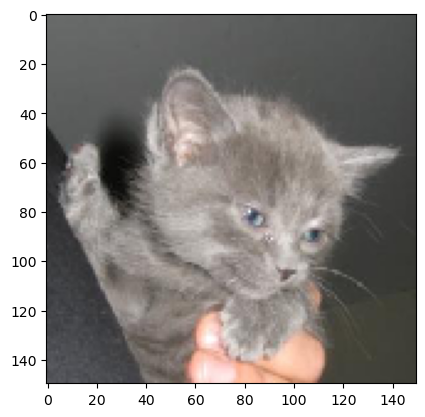

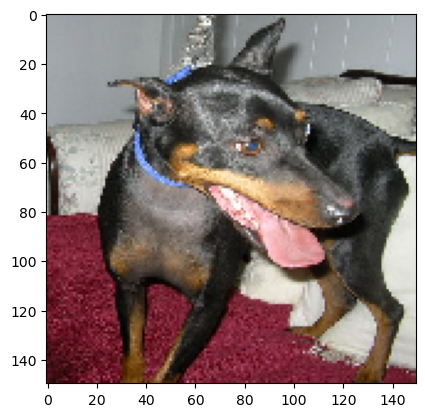

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

cat_image_path = 'data/cats-v-dogs/testing/cats/28.jpg'
dog_image_path = 'data/cats-v-dogs/testing/dogs/13.jpg'

cat_img = tf.keras.utils.load_img(cat_image_path, target_size=(150, 150))
cat = np.array(cat_img)
cat = np.expand_dims(cat, axis=0)
dog_img = tf.keras.utils.load_img(dog_image_path, target_size=(150, 150))
dog = np.array(dog_img)
dog = np.expand_dims(dog, axis=0)

print('cat.shape:', cat.shape)
print('dog.shape:', dog.shape)

imgplot = plt.imshow(cat_img)
plt.show()

imgplot = plt.imshow(dog_img)
plt.show()



Load the model

In [3]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model

INPUT_SHAPE = (150, 150, 3)

pre_trained_model = InceptionV3(input_shape=INPUT_SHAPE,
                                include_top=False,
                                weights=None)
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(1, activation='sigmoid')(x)
model = Model(pre_trained_model.input, x)
model.load_weights('model/inception_v3.h5')

2023-02-11 17:30:39.588437: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-11 17:30:39.605355: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-11 17:30:39.605556: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-11 17:30:39.606090: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

Predict on test images

In [4]:
def translate_prediction(prediction):
    if prediction[0] > 0.5:
        return 'dog'
    else:
        return 'cat'

cat_pred = model.predict(cat)
imgplot = plt.imshow(cat_img)
plt.show()
cat_pred = translate_prediction(cat_pred)
print("1st prediction: ", cat_pred)
dog_pred = model.predict(dog)
imgplot = plt.imshow(dog_img)
plt.show()
dog_pred = translate_prediction(dog_pred)
print("2nd prediction: ", dog_pred)

2023-02-11 17:30:43.082965: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8800


1/1 [==============================] - 2s 2s/step
1st prediction:  cat
1/1 [==============================] - 0s 22ms/step
2nd prediction:  dog


2023-02-11 17:30:44.158783: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
